## Digital Skill Essential or known as DSE

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

### Read Dataset

In [9]:
df_test = pd.read_csv('./datasets/all_test_combined.csv')
df_test.drop(columns=df_test.columns[0], axis=1, inplace=True) # drop the first column by name
# df_test.head()

### Replace Null Value and Set Label

In [10]:
# Replace - with None
columns = df_test.columns
for col in columns:
    # print(col)
    df_test[col] = df_test[col].replace(['-'], float(0))

In [11]:
df_test['Grade/100.00'] = df_test['Grade/100.00'].astype('float64')

df_50_passing_rate = df_test # copy dataset for visualize passing score of 50

df_test.loc[df_test['Grade/100.00'] >= float(60), 'label'] = 'Passed'
df_test.loc[df_test['Grade/100.00'] < float(60), 'label'] = 'Failed'
df_test.head(3)

/var/folders/dt/90w7dnxx5xzfd7px48yrrpt00000gn/T/ipykernel_30540/2067415733.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test.loc[df_test['Grade/100.00'] >= float(60), 'label'] = 'Passed'


,Surname,First name,Email address,State,Started on,Completed,Time taken,Grade/100.00,Q. 1 /1.00,Q. 2 /1.00,...,Q. 92 /1.00,Q. 93 /1.00,Q. 94 /1.00,Q. 95 /1.00,Q. 96 /1.00,Q. 97 /1.00,Q. 98 /1.00,Q. 99 /1.00,Q. 100 /1.00,label
0,ហ៊ន,គឹម,dp230109@DSEPROVINCE23.com,Finished,12 January 2023 8:25 AM,12 January 2023 10:20 AM,1 hour 55 mins,59.48,1.0,0.00,...,0.67,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,Failed
1,ពេជ្រពន្លឺ,ជុំ,dp230126@DSEPROVINCE23.com,Finished,12 January 2023 8:25 AM,12 January 2023 10:25 AM,2 hours,45.73,1.0,0.00,...,0.50,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Failed
2,កន្និកា,ងី,dp230112@DSEPROVINCE23.com,Finished,12 January 2023 8:25 AM,12 January 2023 9:42 AM,1 hour 16 mins,55.73,0.0,0.00,...,0.00,1.00,1.00,0.67,1.00,1.00,1.00,0.00,1.00,Failed


In [12]:
df_test['Started on'] = pd.to_datetime(df_test['Started on'], format='mixed')
df_test['Completed'] = pd.to_datetime(df_test['Completed'], format='mixed')

In [13]:
# Find Duplicated Rows
duplicated_rows = df_test[df_test.duplicated(keep=False)]
print("Double Duplicated Rows :", len(duplicated_rows))
print("Unique Duplicated :", len(duplicated_rows['Email address'].unique()))

Double Duplicated Rows : 348
Unique Duplicated : 174


In [14]:
# Remove duplicated rows
df_no_duplicates = df_test.drop_duplicates(keep='first')
print("DataFrame without Duplicates:")

df_test = df_no_duplicates
df_test

DataFrame without Duplicates:


,Surname,First name,Email address,State,Started on,Completed,Time taken,Grade/100.00,Q. 1 /1.00,Q. 2 /1.00,...,Q. 92 /1.00,Q. 93 /1.00,Q. 94 /1.00,Q. 95 /1.00,Q. 96 /1.00,Q. 97 /1.00,Q. 98 /1.00,Q. 99 /1.00,Q. 100 /1.00,label
0,ហ៊ន,គឹម,dp230109@DSEPROVINCE23.com,Finished,2023-01-12 08:25:00,2023-01-12 10:20:00,1 hour 55 mins,59.48,1.0,0.00,...,0.67,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,Failed
1,ពេជ្រពន្លឺ,ជុំ,dp230126@DSEPROVINCE23.com,Finished,2023-01-12 08:25:00,2023-01-12 10:25:00,2 hours,45.73,1.0,0.00,...,0.50,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Failed
2,កន្និកា,ងី,dp230112@DSEPROVINCE23.com,Finished,2023-01-12 08:25:00,2023-01-12 09:42:00,1 hour 16 mins,55.73,0.0,0.00,...,0.00,1.00,1.00,0.67,1.00,1.00,1.00,0.00,1.00,Failed
3,សុវណ្ណៈ,ឆាយ,dp230119@DSEPROVINCE23.com,Finished,2023-01-12 08:25:00,2023-01-12 10:20:00,1 hour 55 mins,55.82,1.0,1.00,...,0.67,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,Failed
4,កញ្ញា,គង់,dp230107@DSEPROVINCE23.com,Finished,2023-01-12 08:25:00,2023-01-12 09:58:00,1 hour 32 mins,61.13,0.0,0.00,...,1.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,Passed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,លីវី,ប៉ៅ,dp23541cadt2023@gmail.com,Finished,2023-08-08 13:08:00,2023-08-08 15:08:00,2 hours,56.31,1.00,0.00,...,0.50,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,Failed
2064,ម៉នសុី,សៃ,dp23531cadt2023@gmail.com,Finished,2023-08-08 13:08:00,2023-08-08 14:51:00,1 hour 42 mins,40.78,1.00,0.00,...,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,Failed
2065,នីតា,ញ៉ាណ,dp23540cadt2023@gmail.com,Finished,2023-08-08 13:16:00,2023-08-08 15:14:00,1 hour 58 mins,53.55,1.00,0.00,...,1.00,1.00,1.00,1.00,0.67,0.00,1.00,1.00,0.00,Failed
2066,ចាន់មុនីរតន៍,វុធ,dp23549cadt2023@gmail.com,Finished,2023-08-08 13:28:00,2023-08-08 15:28:00,1 hour 59 mins,32.25,0.00,0.00,...,0.0,0.00,0.00,0.0,1.00,0.00,0.00,0.0,0.00,Failed


In [15]:
print("Max Date:", df_test['Completed'].max())
print("Min Date", df_test['Completed'].min())

Max Date: 2023-08-08 15:31:00
Min Date 1970-01-01 00:00:00


In [16]:
df_test
df_test.to_csv("./datasets/dse_exam_cleaned_with_label.csv")

In [17]:
num_of_examinee = len(df_test)
num_finished_examinee = len(df_test[df_test['State'] == "Finished"])
num_in_progress_examinee = len(df_test[df_test['State'] != "Finished"])
num_failed = len(df_test[df_test['label'] == 'Failed'])
num_passed = len(df_test[df_test['label'] == 'Passed'])


print("Total Examinee:", num_of_examinee)
print("Total Finished Examinee:", num_finished_examinee)
print("Total Examinee in Progress:", num_in_progress_examinee)
print("Number of Passed Examinee:", num_passed, " | Passing rate:", num_passed / (num_passed+num_failed))
print("Number of Failed Examinee:", num_failed, " | Failing rate:", num_failed / (num_passed+num_failed))

Total Examinee: 2068
Total Finished Examinee: 2066
Total Examinee in Progress: 2
Number of Passed Examinee: 800  | Passing rate: 0.38684719535783363
Number of Failed Examinee: 1268  | Failing rate: 0.6131528046421664


### Basic Statistical Information

|                               | Information   |
|-------------------------------|-------------  |
| Total Examinee                | 2068          |
| Total Finished Examinee       | 2066          |
| Total Examinee in Progress    | 2             |
| Number of Passed Examinee     | 800           |
| Number of Failed Examinee     | 1268          |
| Passing Rate                  | 39%           |
| Failed Rate                   | 61%           |

In [18]:
df_finished = df_test[df_test['State'] == "Finished"]
df_test = df_finished
len(df_finished)

2066

In [19]:
print("Max Score: ", df_finished['Grade/100.00'].max())
print("Min Score: ", df_finished['Grade/100.00'].min())
print("Average Score: ", df_finished['Grade/100.00'].mean())
print("Total examinee: ", df_finished['Grade/100.00'].count())
print("Sum Score: ", df_finished['Grade/100.00'].sum())
print("Standard Deviation: ", df_finished['Grade/100.00'].std())
print("Variance: ", df_finished['Grade/100.00'].var())
print("Median: ", df_finished['Grade/100.00'].median())

Max Score:  94.18
Min Score:  3.0
Average Score:  55.788000968054206
Total examinee:  2066
Sum Score:  115258.01
Standard Deviation:  14.786575913199206
Variance:  218.64282723680296
Median:  55.43


### Common Aggregation Function Information

|                | Information   |
|----------------|-------------  |
| Max Score      | 94.18         |
| Min Score      | 3.0           |
| Average Score  | 55.45         |
| Sum Score      | 124214.28     |
| Standard Deviation | 14.65     |
| Variance       | 214.83        |
| Median         | 55.14         |

In [20]:
# df_test = df_test[df_test['Grade/100.00'] != 3]

<Axes: title={'center': 'Grade/100.00'}, xlabel='label'>

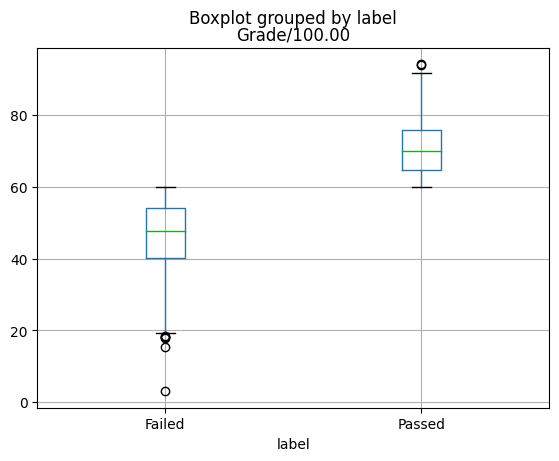

In [21]:
# Check Outlier
df_test.boxplot(column=['Grade/100.00'], by='label')

In [22]:
# height = [num_passed, num_failed]
# label = ['Passed', 'Failed']

# plt.bar(label, height)

# for i in range(len(height)):
#     plt.text(i, i+height[i]+10, height[i], ha = 'center')

# plt.xlabel("Status")
# plt.ylabel("Number of examinee")
# plt.title("Examination Result")

# plt.show()

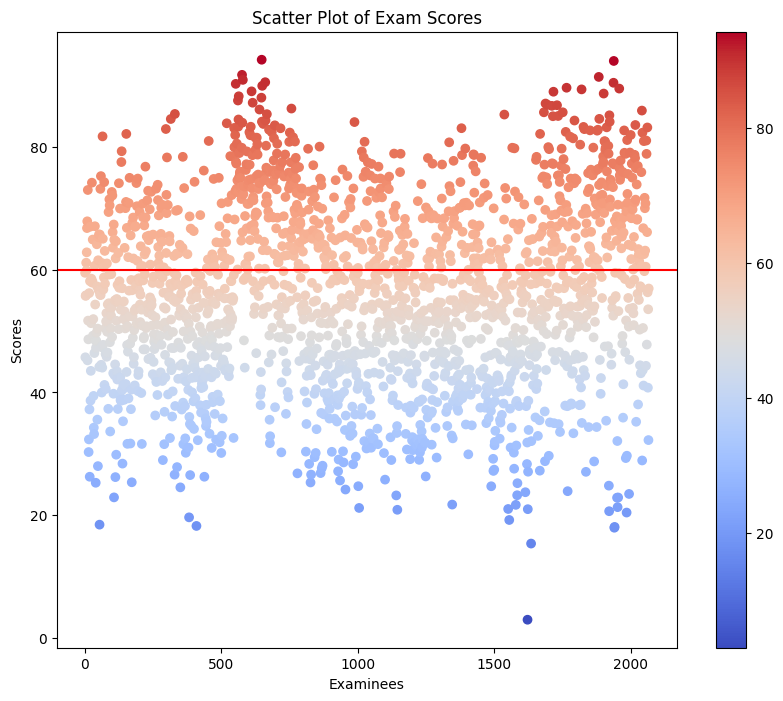

In [23]:
# Create a scatter plot of the data
plt.figure(figsize=(10, 8))
df_scatter = df_test.assign(id=range(1, len(df_test) + 1))
plt.scatter(df_scatter['id'], df_scatter['Grade/100.00'], c=df_scatter['Grade/100.00'], cmap='coolwarm')
plt.colorbar()

# Set the minimum and maximum values for the colorbar
plt.clim(df_scatter['Grade/100.00'].min(), df_scatter['Grade/100.00'].max())

# Add labels and title
plt.xlabel("Examinees")
plt.ylabel("Scores")
plt.title("Scatter Plot of Exam Scores")

plt.axhline(60, color='red')

# Show the scatter plot
plt.show()


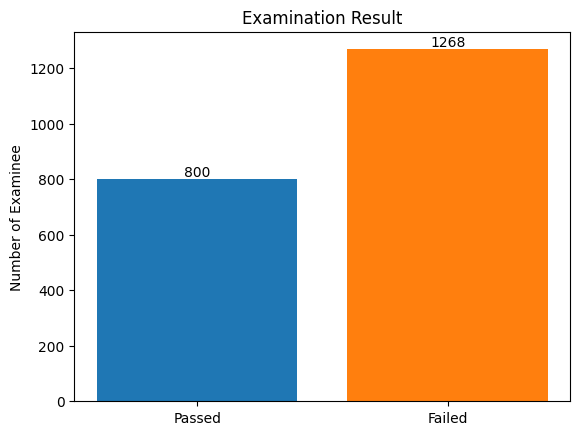

In [24]:
fig, ax = plt.subplots()

label = ['Passed', 'Failed']
height = [num_passed, num_failed]
bar_labels = ['blue', 'orange']
bar_colors = ['tab:blue', 'tab:orange']

ax.bar(label, height, label=bar_labels, color=bar_colors)

for i in range(len(height)):
    plt.text(i, i+height[i]+10, height[i], ha = 'center')

ax.set_ylabel('Number of Examinee')
plt.title("Examination Result")

plt.show()

Passing Rate: 0.39
Failed Rate: 0.61


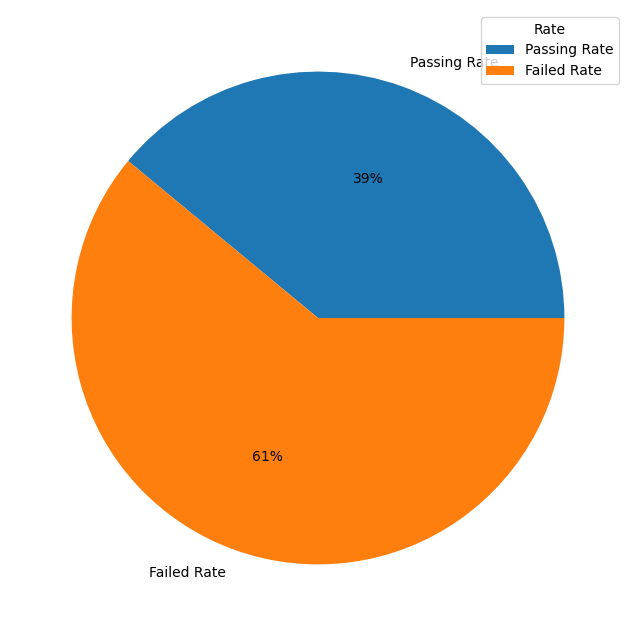

In [25]:
plt.figure(figsize=(10, 8))

passing_rate = format(num_passed / (num_passed+num_failed), '.2f')
failed_rate = format(num_failed / (num_passed+num_failed), '.2f')

print('Passing Rate:', passing_rate)
print('Failed Rate:', failed_rate)

# Data for the pie chart
labels = 'Passing Rate', 'Failed Rate'
sizes = [passing_rate, failed_rate]

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.0f%%')

# Set the legend
# plt.legend(title="Rate")
plt.legend(title="Rate", loc='upper right')

# Show the plot
plt.show()

In [26]:
passed_df = df_finished[df_finished['label'] == 'Passed']
print("Average Score of Passed Examinee: ", passed_df['Grade/100.00'].mean())

failed_df = df_finished[df_finished['label'] == 'Failed']
print("Average Score of Failed Examinee: ", failed_df['Grade/100.00'].mean())

Average Score of Passed Examinee:  70.80358749999999
Average Score of Failed Examinee:  46.299478672985785


### Average Score of Each Passed and Failed Examinee

|                | Information                 |
|----------------|---------------------------  |
| Average Score of Passed Examinees  | 70.80   |
| Average Score of Failed Examinees  | 46.29   |

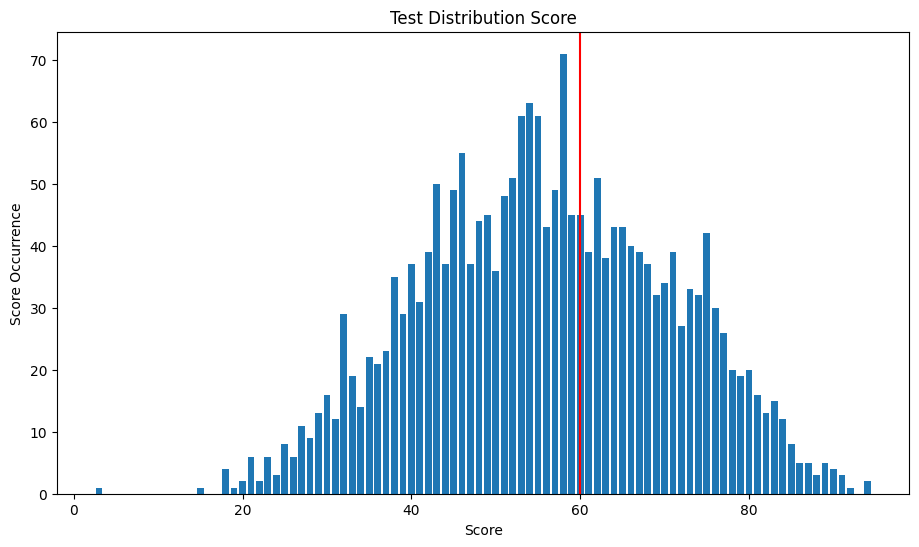

In [27]:
find_median_df = df_finished

def convert_list_to_integers(list):
  new_list = []
  for value in list:
    try:
      new_list.append(int(value))
    except ValueError:
      pass

  return new_list

plt.figure(figsize=(11,6))

list = sorted(find_median_df['Grade/100.00'].round(0).tolist())
counter = Counter(list)
keys = counter.keys()
values = counter.values()

height = convert_list_to_integers(values) 
label = keys

plt.bar(label, height)

# for i in range(len(height)):
#     plt.text(i, i+height[i], height[i], ha = 'center')

plt.axvline(60, color='red')


plt.xlabel("Score")
plt.ylabel("Score Occurrence")
plt.title("Test Distribution Score")

plt.show()

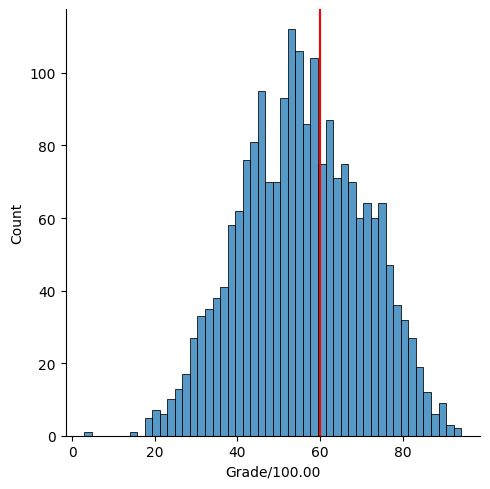

In [28]:
distribution = df_finished

# plt.figure(figsize=(10,10))
sns.displot(distribution, 
            x="Grade/100.00", 
            bins=50)

plt.axvline(60, color='red')

# plt.savefig("Seaborn_histogram_with_displot.png",
#                     format='png',dpi=150)


In [29]:
mean = df_finished['Grade/100.00'].mean()
mean

55.788000968054206

In [30]:
std = df_finished['Grade/100.00'].std()
std

14.786575913199206

In [31]:
mean = df_finished['Grade/100.00'].mean()
std = df_finished['Grade/100.00'].std()
distribution_score = (mean - 50) / std
distribution_score

0.39143619199138313

In [32]:
mean = df_finished['Grade/100.00'].mean()
std = df_finished['Grade/100.00'].std()
distribution_score = (mean - 60) / std
distribution_score

-0.28485290013531545

In [33]:
mean = df_finished['Grade/100.00'].mean()
std = df_finished['Grade/100.00'].std()
distribution_score = (mean - 70) / std
distribution_score

-0.961141992262014

## If Passing Score is 50

Number of Passed Examinee: 1433  | Passing rate: 0.6391614629794826
Number of Failed Examinee: 809  | Failing rate: 0.3608385370205174
Passing Rate": 0.64
Failed Rate: 0.36


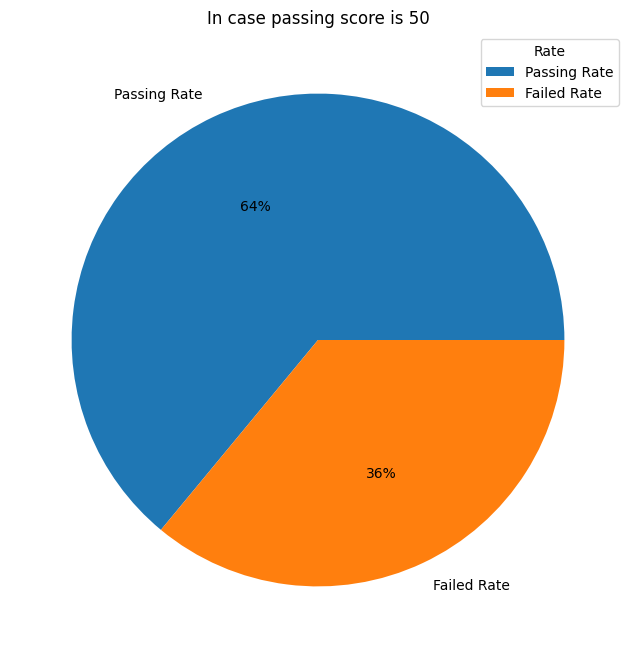

In [34]:
df_50_passing_rate.loc[df_50_passing_rate['Grade/100.00'] >= float(50), 'label'] = 'Passed'
df_50_passing_rate.loc[df_50_passing_rate['Grade/100.00'] < float(50), 'label'] = 'Failed'

num_failed = len(df_50_passing_rate[df_50_passing_rate['label'] == 'Failed'])
num_passed = len(df_50_passing_rate[df_50_passing_rate['label'] == 'Passed'])

print("Number of Passed Examinee:", num_passed, " | Passing rate:", num_passed / (num_passed+num_failed))
print("Number of Failed Examinee:", num_failed, " | Failing rate:", num_failed / (num_passed+num_failed))

plt.figure(figsize=(10, 8))

passing_rate = format(num_passed / (num_passed+num_failed), '.2f')
failed_rate = format(num_failed / (num_passed+num_failed), '.2f')

print('Passing Rate":', passing_rate)
print('Failed Rate:', failed_rate)

# Data for the pie chart
labels = 'Passing Rate', 'Failed Rate'
sizes = [passing_rate, failed_rate]

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.0f%%')

# Set the legend
plt.legend(title="Rate", loc='upper right')

plt.title('In case passing score is 50')

# Show the plot
plt.show()

In [35]:
passed_df.head(3)

,Surname,First name,Email address,State,Started on,Completed,Time taken,Grade/100.00,Q. 1 /1.00,Q. 2 /1.00,...,Q. 92 /1.00,Q. 93 /1.00,Q. 94 /1.00,Q. 95 /1.00,Q. 96 /1.00,Q. 97 /1.00,Q. 98 /1.00,Q. 99 /1.00,Q. 100 /1.00,label
4,កញ្ញា,គង់,dp230107@DSEPROVINCE23.com,Finished,2023-01-12 08:25:00,2023-01-12 09:58:00,1 hour 32 mins,61.13,0.0,0.00,...,1.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,Passed
6,ឌី,គុយ,dp230110@DSEPROVINCE23.com,Finished,2023-01-12 08:25:00,2023-01-12 10:22:00,1 hour 56 mins,62.82,0.0,1.00,...,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,Passed
7,សិទ្ធីដា,ឈឹម,dp230129@DSEPROVINCE23.com,Finished,2023-01-12 08:25:00,2023-01-12 10:23:00,1 hour 58 mins,66.77,1.0,1.00,...,1.00,1.00,0.00,1.00,0.17,1.00,0.00,1.00,1.00,Passed


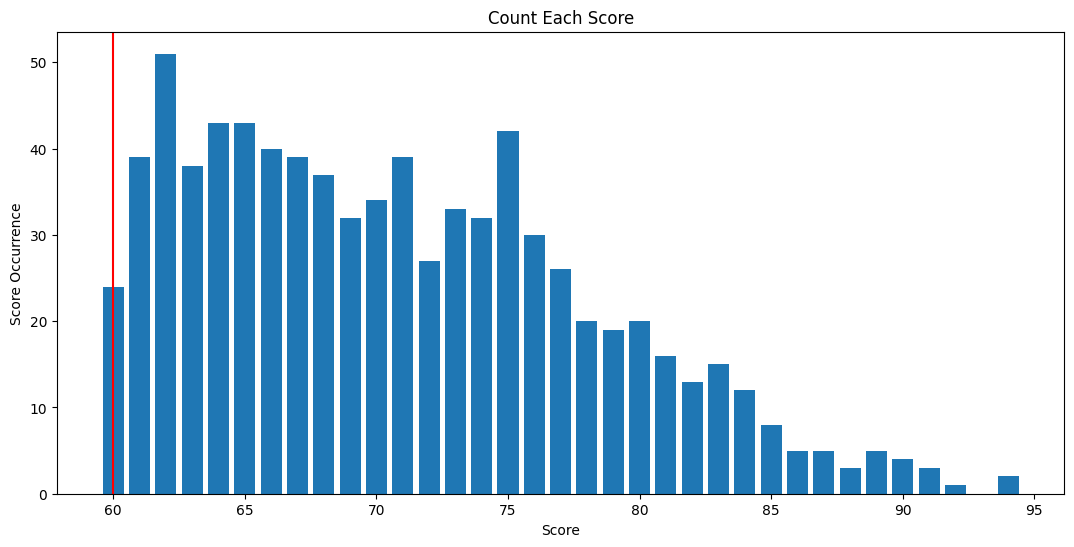

In [36]:
find_median_df = passed_df

def convert_list_to_integers(list):
  new_list = []
  for value in list:
    try:
      new_list.append(int(value))
    except ValueError:
      pass

  return new_list

plt.figure(figsize=(13,6))

list = sorted(find_median_df['Grade/100.00'].round(0).tolist())
counter = Counter(list)
keys = counter.keys()
values = counter.values()

height = convert_list_to_integers(values)
label = keys

plt.bar(label, height)

plt.axvline(60, color='red')


plt.xlabel("Score")
plt.ylabel("Score Occurrence")
plt.title("Count Each Score")

plt.show()

In [37]:
time_taken_counter = Counter(passed_df['Time taken'].tolist())

In [38]:
passed_df.shape

(800, 109)

In [39]:
# time_taken_list = passed_df['Time taken'].tolist()
# hour_min = 0
# min_sec = 0
# day = 0

# average_hour_min = []
# average_min_sec = []

# for item in time_taken_list:
#     if('hour' in item and 'mins' in item):
#         hour_min += 1

#         item.s

#     if('mins' in item and 'secs' in item):
#         min_sec += 1

#     if('days' in item):
#         day += 1


# print(hour_min, min_sec, day)

## Study on Each Subject

In [40]:
question_only_df = df_finished.iloc[:, 8:108]
question_only_df.head(5)
# question_only_df.to_csv("./datasets/question_score_only.csv")

,Q. 1 /1.00,Q. 2 /1.00,Q. 3 /1.00,Q. 4 /1.00,Q. 5 /1.00,Q. 6 /1.00,Q. 7 /1.00,Q. 8 /1.00,Q. 9 /1.00,Q. 10 /1.00,...,Q. 91 /1.00,Q. 92 /1.00,Q. 93 /1.00,Q. 94 /1.00,Q. 95 /1.00,Q. 96 /1.00,Q. 97 /1.00,Q. 98 /1.00,Q. 99 /1.00,Q. 100 /1.00
0,1.0,0.00,1.00,1.00,1.00,0.60,0.00,1.00,1.00,1.00,...,0.17,0.67,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00
1,1.0,0.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,...,0.0,0.50,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,...,1.00,0.00,1.00,1.00,0.67,1.00,1.00,1.00,0.00,1.00
3,1.0,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,...,1.00,0.67,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00
4,0.0,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.20,0.00,...,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00


In [41]:
for col in question_only_df.columns:
    question_only_df[col] = question_only_df[col].astype('float')

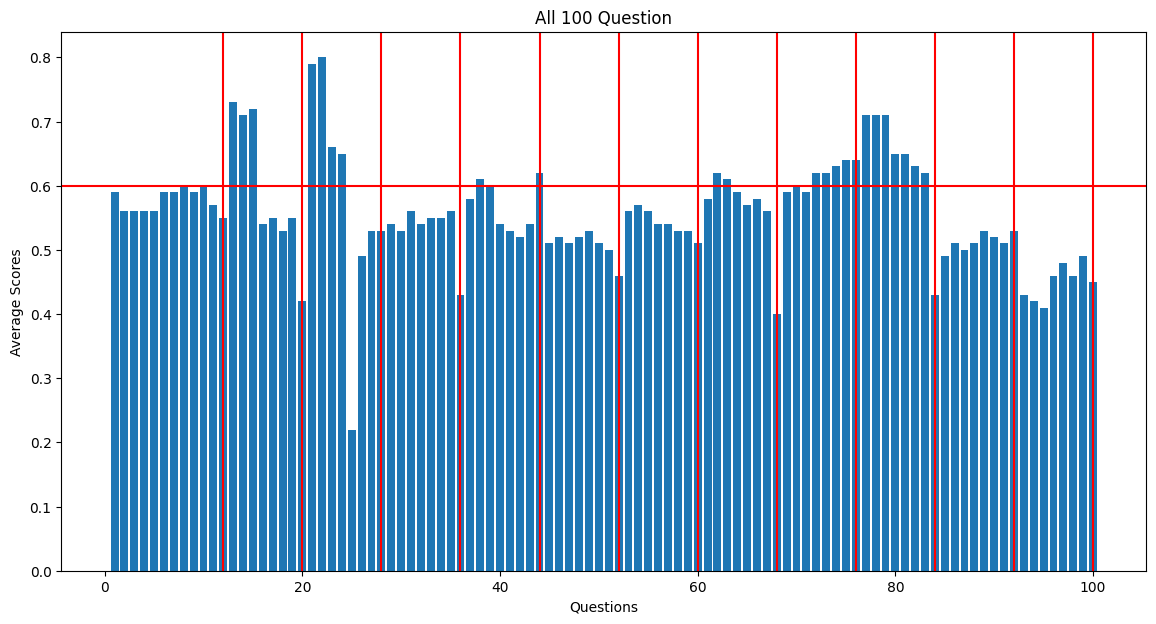

In [42]:
question = []
for i in range(1,101):
    question.append(i)

height = []
for col in question_only_df.columns:
    each_question = question_only_df[col].sum() / len(question_only_df[col])
    each_question = float(format(each_question, '.2f'))
    height.append(each_question)

plt.figure(figsize=(14, 7))

plt.bar(question, height)

# Add labels and title
plt.xlabel("Questions")
plt.ylabel("Average Scores")
plt.title("All 100 Question")

plt.axvline(12, color='red')
plt.axvline(20, color='red')
plt.axvline(28, color='red')
plt.axvline(36, color='red')
plt.axvline(44, color='red')
plt.axvline(52, color='red')
plt.axvline(60, color='red')
plt.axvline(68, color='red')
plt.axvline(76, color='red')
plt.axvline(84, color='red')
plt.axvline(92, color='red')
plt.axvline(100, color='red')


plt.axhline(0.6, color='red')

# Show the bar chart
plt.show()

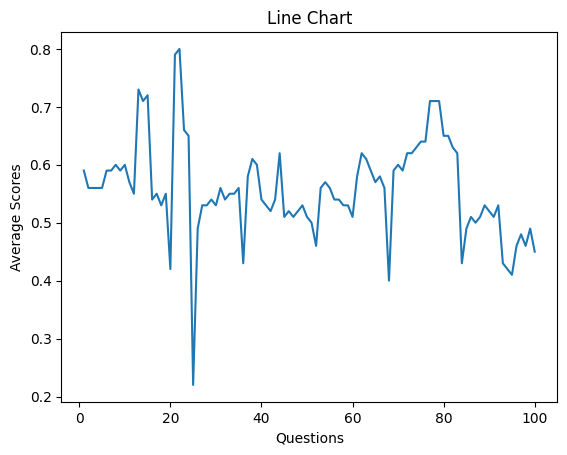

In [43]:
# Create a line chart of the data
plt.plot(question, height)

# Add labels and title
plt.xlabel("Questions")
plt.ylabel("Average Scores")
plt.title("Line Chart")

# Show the line chart
plt.show()

#### Prepare Score Frame base each Subject

In [44]:
subject_1 = question_only_df.iloc[:, 0:12]
subject_2 = question_only_df.iloc[:, 12:20]
subject_3 = question_only_df.iloc[:, 20:28]
subject_4 = question_only_df.iloc[:, 28:36]
subject_5 = question_only_df.iloc[:, 36:44]
subject_6 = question_only_df.iloc[:, 44:52]
subject_7 = question_only_df.iloc[:, 52:60]
subject_8 = question_only_df.iloc[:, 60:68]
subject_9 = question_only_df.iloc[:, 68:76]
subject_10 = question_only_df.iloc[:, 76:84]
subject_11 = question_only_df.iloc[:, 84:92]
subject_12 = question_only_df.iloc[:, 92:100]

In [45]:
# function to calculate average score of each subject
def cal_avg_subject(subject, height):
    for col in subject.columns:
        each_question = subject[col].sum() / len(subject[col])
        each_question = float(format(each_question, '.2f'))
        height.append(each_question)
    return float(format(np.average(height), '.2f'))

#test function on subject1
print("Subject 1:", cal_avg_subject(subject_1, []))

Subject 1: 0.58


[0.58, 0.59, 0.58, 0.53, 0.57, 0.51, 0.54, 0.56, 0.62, 0.64, 0.51, 0.45]


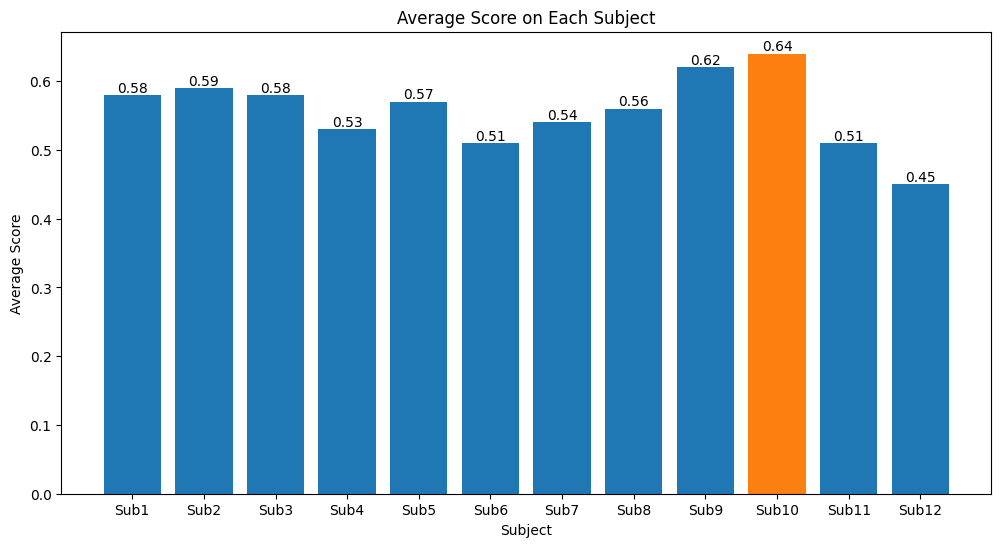

In [46]:
label = ['Sub1', 'Sub2', 'Sub3', 'Sub4', 'Sub5', 'Sub6', 'Sub7', 'Sub8', 'Sub9', 'Sub10', 'Sub11', 'Sub12']
height = [cal_avg_subject(subject_1, []), 
          cal_avg_subject(subject_2, []), 
          cal_avg_subject(subject_3, []), 
          cal_avg_subject(subject_4, []), 
          cal_avg_subject(subject_5, []), 
          cal_avg_subject(subject_6, []), 
          cal_avg_subject(subject_7, []),
          cal_avg_subject(subject_8, []),
          cal_avg_subject(subject_9, []),
          cal_avg_subject(subject_10, []),
          cal_avg_subject(subject_11, []),
          cal_avg_subject(subject_12, []),]

print(height)

plt.figure(figsize=(12, 6))

# plt.bar(label, height)

for i, bar in enumerate(plt.bar(label, height)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(height[i]), ha='center', va='bottom')
    
max_value = np.max(height)
plt.bar(label[9], height[9], color='#FD7F0F')

plt.xlabel("Subject")
plt.ylabel("Average Score")
plt.title("Average Score on Each Subject")

plt.show()

[0.59, 0.56, 0.56, 0.56, 0.56, 0.59, 0.59, 0.6, 0.59, 0.6, 0.57, 0.55]


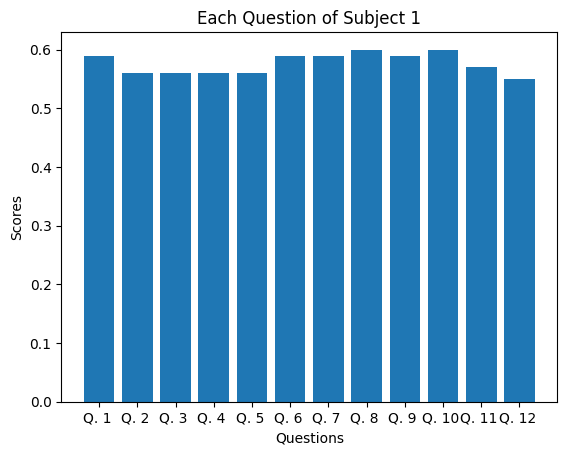

In [47]:
question = []
for col in subject_1.columns:
    question.append(col.split('/')[0])

height = []
for col in subject_1.columns:
    each_question = subject_1[col].sum() / len(subject_1[col])
    each_question = float(format(each_question, '.2f'))
    height.append(each_question)

print(height)

plt.bar(question, height)

# Add labels and title
plt.xlabel("Questions")
plt.ylabel("Scores")
plt.title("Each Question of Subject 1")

# Show the bar chart
plt.show()

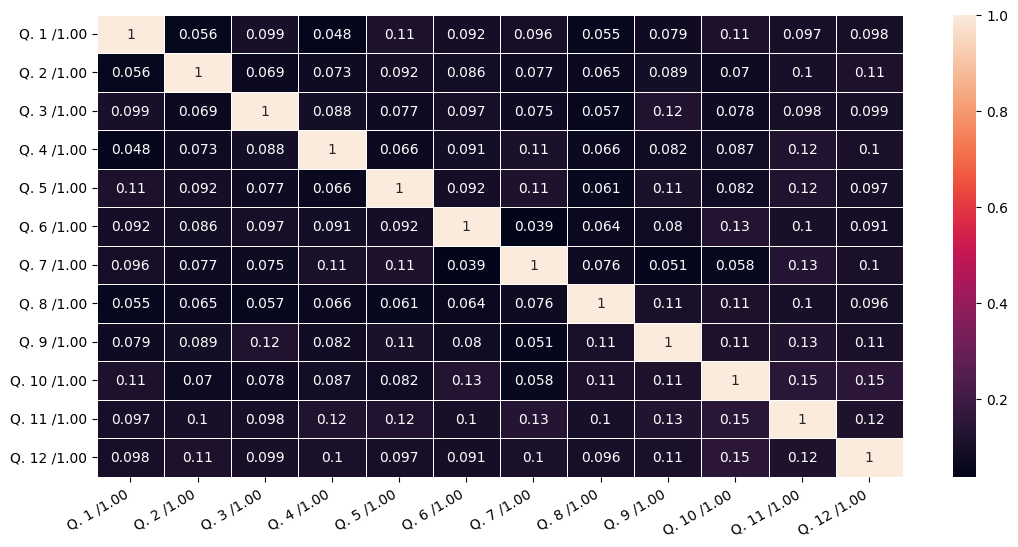

In [48]:
corrmat = subject_1.corr()

plt.figure(figsize=(13, 6))
sns.heatmap(corrmat, vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

In [49]:
# df_finished.hist()

In [50]:
df_finished

,Surname,First name,Email address,State,Started on,Completed,Time taken,Grade/100.00,Q. 1 /1.00,Q. 2 /1.00,...,Q. 92 /1.00,Q. 93 /1.00,Q. 94 /1.00,Q. 95 /1.00,Q. 96 /1.00,Q. 97 /1.00,Q. 98 /1.00,Q. 99 /1.00,Q. 100 /1.00,label
0,ហ៊ន,គឹម,dp230109@DSEPROVINCE23.com,Finished,2023-01-12 08:25:00,2023-01-12 10:20:00,1 hour 55 mins,59.48,1.0,0.00,...,0.67,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,Failed
1,ពេជ្រពន្លឺ,ជុំ,dp230126@DSEPROVINCE23.com,Finished,2023-01-12 08:25:00,2023-01-12 10:25:00,2 hours,45.73,1.0,0.00,...,0.50,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Failed
2,កន្និកា,ងី,dp230112@DSEPROVINCE23.com,Finished,2023-01-12 08:25:00,2023-01-12 09:42:00,1 hour 16 mins,55.73,0.0,0.00,...,0.00,1.00,1.00,0.67,1.00,1.00,1.00,0.00,1.00,Failed
3,សុវណ្ណៈ,ឆាយ,dp230119@DSEPROVINCE23.com,Finished,2023-01-12 08:25:00,2023-01-12 10:20:00,1 hour 55 mins,55.82,1.0,1.00,...,0.67,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,Failed
4,កញ្ញា,គង់,dp230107@DSEPROVINCE23.com,Finished,2023-01-12 08:25:00,2023-01-12 09:58:00,1 hour 32 mins,61.13,0.0,0.00,...,1.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,Passed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,លីវី,ប៉ៅ,dp23541cadt2023@gmail.com,Finished,2023-08-08 13:08:00,2023-08-08 15:08:00,2 hours,56.31,1.00,0.00,...,0.50,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,Failed
2064,ម៉នសុី,សៃ,dp23531cadt2023@gmail.com,Finished,2023-08-08 13:08:00,2023-08-08 14:51:00,1 hour 42 mins,40.78,1.00,0.00,...,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,Failed
2065,នីតា,ញ៉ាណ,dp23540cadt2023@gmail.com,Finished,2023-08-08 13:16:00,2023-08-08 15:14:00,1 hour 58 mins,53.55,1.00,0.00,...,1.00,1.00,1.00,1.00,0.67,0.00,1.00,1.00,0.00,Failed
2066,ចាន់មុនីរតន៍,វុធ,dp23549cadt2023@gmail.com,Finished,2023-08-08 13:28:00,2023-08-08 15:28:00,1 hour 59 mins,32.25,0.00,0.00,...,0.0,0.00,0.00,0.0,1.00,0.00,0.00,0.0,0.00,Failed


In [51]:
df_finished
df_finished = df_finished[['State', 'Grade/100.00', 'label']]
df_finished

,State,Grade/100.00,label
0,Finished,59.48,Failed
1,Finished,45.73,Failed
2,Finished,55.73,Failed
3,Finished,55.82,Failed
4,Finished,61.13,Passed
...,...,...,...
2063,Finished,56.31,Failed
2064,Finished,40.78,Failed
2065,Finished,53.55,Failed
2066,Finished,32.25,Failed


## Lib: ydata_profiling

In [52]:
from ydata_profiling import ProfileReport # pip install ipywidgets
profile = ProfileReport(df_finished, title="Profiling Report")
profile
# profile.to_file("ydata_profiling_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]